### Problem 1.

### Using R, generate a random variable X that has 10,000 random uniform numbers from 1 to N, where N can be any number of your choosing greater than or equal to 6.  Then generate a random variable Y that has 10,000 random normal numbers with a mean of $\mu=\sigma=(N+1)/2$.  

### Probability.   

### Calculate as a minimum the below probabilities a through c.  Assume the small letter "x" is estimated as the median of the X variable, and the small letter "y" is estimated as the 1st quartile of the Y variable.  Interpret the meaning of all probabilities. 5 points  

### a.  P(X>x | X>y)		
### b.  P(X>x | Y>y)		
### c.  P(X<x | X>y)	


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact, chisquare
import numpy as np

In [2]:
unif_dist = np.random.uniform(1,100,10000)
norm_dist = np.random.normal(101/2,101/2,10000)

dist_df = pd.DataFrame(np.array([unif_dist, 
                                 norm_dist]).T,
                        columns=['uniform',
                                'normal'])

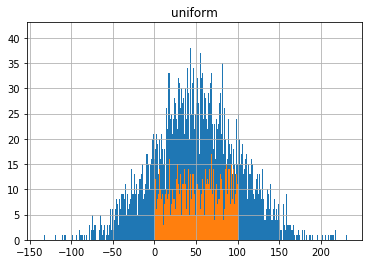

In [8]:
fig, ax = plt.subplots(1)
dist_df.hist(column='normal',
             sharex=True,
             sharey=True,
             bins=1000,
             ax=ax);
dist_df.hist(column='uniform',
             sharex=True,
             sharey=True,
             bins=1000,
             ax=ax);

### a.  P(X>x | X>y)

#### P(X>x)

In [3]:
len(dist_df[dist_df['uniform']>dist_df['uniform'].median()])/len(dist_df)

0.5

##### Predictable. Since we're using the median, so half the values fall below this

#### P(X>y)

In [4]:
len(dist_df[dist_df['uniform']>dist_df['normal'].quantile(.25)])/len(dist_df)

0.8487

##### The uniform distirbution (in the plot above) is much  more condensed than the normal, so more than 75% of those values fall above the the 25th percentile of the normal distribution.

#### P(X>x & X>y )

In [5]:
len(dist_df[(dist_df['uniform']>dist_df['normal'].quantile(.25))&
            (dist_df['uniform']>dist_df['uniform'].median())])/len(dist_df)

0.5

####  P(X>x) + P(X>y) - P(X>x & X>y ) or P(X>x | X>y )

In [30]:
.5 + 0.8487 - 0.5

0.8487

##### Both distirbutions are centered at .5 so you are left with P(X>y)

#### Alternative Method

In [29]:
len(dist_df[(dist_df['uniform']>dist_df['uniform'].median())|
            (dist_df['uniform']>dist_df['normal'].quantile(.25))])/len(dist_df)

0.8487

### b.  P(X>x, Y>y)

#### P(X>x)

In [9]:
len(dist_df[dist_df['uniform']>dist_df['uniform'].median()])/len(dist_df)

0.5

#### P(Y>y)

In [10]:
len(dist_df[dist_df['normal']>dist_df['normal'].quantile(.25)])/len(dist_df)

0.75

#### P(X>x & Y>y )

In [39]:
len(dist_df[(dist_df['normal']>dist_df['normal'].quantile(.25))&
            (dist_df['uniform']>dist_df['uniform'].median())])/len(dist_df)

0.3758

####  P(X>x) + P(Y>y) - P(X>x & Y>y ) or P(X>x | Y>y )

In [38]:
.5 + .75 - 0.3758

0.8742

##### We're capturing the majority of the values here: 50% of the uniform distribution and 75% of the uniform distribution

#### Alternative Method

In [32]:
len(dist_df[(dist_df['normal']>dist_df['normal'].quantile(.25))|
            (dist_df['uniform']>dist_df['uniform'].median())])/len(dist_df)

0.8742

### c.  P(X<x | X>y)

#### P(X<x)

In [33]:
len(dist_df[dist_df['uniform']<dist_df['uniform'].median()])/len(dist_df)

0.5

#### P(X>y)

In [34]:
len(dist_df[dist_df['uniform']>dist_df['normal'].quantile(.25)])/len(dist_df)

0.8487

#### P(X<x & X>y )

In [35]:
len(dist_df[(dist_df['uniform']>dist_df['normal'].quantile(.25))&
            (dist_df['uniform']<dist_df['uniform'].median())])/len(dist_df)

0.3487

####  P(X<x) + P(Y>y) - P(X<x & X>y ) or P(X<x | X>y )

In [37]:
0.5 + 0.8487 - 0.3487

1.0

##### The above is 1 because we're capturing the full spectrum. With both probabilities we're capturing 50% of the data

#### Alternative Method

In [18]:
len(dist_df[(dist_df['uniform']>dist_df['normal'].quantile(.25))|
            (dist_df['uniform']<dist_df['uniform'].median())])/len(dist_df)

1.0

### 5 points. Investigate whether $P(X>x \space and\space Y>y)=P(X>x)P(Y>y)$ by building a table and evaluating the marginal and joint probabilities.

In [19]:
0.3749, .5 * 0.75

(0.3749, 0.375)

##### This seems to be the case. 


### 5 points.  Check to see if independence holds by using Fisher’s Exact Test and the Chi Square Test.  What is the difference between the two? Which is most appropriate?

#### Build the counts for the four filters

In [20]:
joint_prob = np.array((len(dist_df[(dist_df['normal']<dist_df['normal'].quantile(.25))&
                          (dist_df['uniform']<dist_df['uniform'].median())]),
                       len(dist_df[(dist_df['normal']>dist_df['normal'].quantile(.25))&
                          (dist_df['uniform']<dist_df['uniform'].median())]),
                       len(dist_df[(dist_df['normal']<dist_df['normal'].quantile(.25))&
                          (dist_df['uniform']>dist_df['uniform'].median())]),
                       len(dist_df[(dist_df['normal']>dist_df['normal'].quantile(.25))&
                          (dist_df['uniform']>dist_df['uniform'].median())]))).reshape(2,2)

joint_prob

array([[1258, 3742],
       [1242, 3758]])

#### Build the probability table

In [21]:
probability_table = pd.DataFrame(joint_prob,
                                  columns=['Y<y','Y>y'],
                                  index=['X<x','X>x'])

probability_table

,Y<y,Y>y
X<x,1258,3742
X>x,1242,3758


#### Fisher Exact Test

In [24]:
print('Test Statistics for Fisher Exact:',fisher_exact(probability_table)[0])
print('P Values for Fisher Exact:',fisher_exact(probability_table)[1])

Test Statistics for Fisher Exact: 1.0172133186331591
P Values for Fisher Exact: 0.7290389479689763


#### Chi Square Test

In [25]:
print('Test Statistics for Chi Square:',chisquare(joint_prob)[0])
print('P Values for Chi Square:',chisquare(joint_prob)[1])

Test Statistics for Chi Square: [0.1024     0.03413333]
P Values for Chi Square: [0.74896833 0.85342349]


##### The Fisher test is typically used in instances where you have two nominal variables, and you want to know if one affects the other. Since it relies on the hypergeometric distribution, the computed factorials can become very large, so it is best used when the sample size is small. The Chi Square test can be performed on more than two categories (that is,  it does not require a strictly 2*2 table). Futher, it is better for large frequencies, such as in this case.